# Tarea 1
## Francisco Javier Peralta Ramírez

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]

def matrix_transpose(mtx):
    tr = [] # lista donde guararemos la transpuesta
    for j in range(len(mtx[0])):
        t_v = [] #lista temporal para almacenar cada renglon
        for i in range(len(mtx)):
            t_v.append(mtx[i][j]) #cambiamos los indices (i,j) a (j,i)
        tr.append(t_v) #agregamos la lista intercalada a nuestra transpuesta
    return tr

matrix_transpose(A)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]

In [3]:
def matrix_transpose2(mtx):
    return [
             [   #internamente iteremos sobre i
                 mtx[i][j] for i in range(len(mtx))
             ]
             for j in range(len(mtx[0])) #iteramos sobre j externamente
           ]
matrix_transpose2(A)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]

In [28]:
def gen_random_sample_dist(interval, seed=56125798, c=12345, m=32768, a=1103515245):
    x,y = interval # pasa intervalo a dos variables (mas facil de manejar)
    seed = [seed] #copiar a arreglo, evitando errores de scope
    def aleatorio():
        seed[0] = (a * seed[0] + c) % m
        return seed[0] % (y - x) + x
    return aleatorio #regresa funcion que regresa valores aleatorios en el rango

def gen_N_rand_samples(n, N, interval):
    al = gen_random_sample_dist(interval)
    def gen_multi_random(N, interval):
        return [al() for j in range(N)]
    samples = [gen_multi_random(N, interval) for j in range(n)]
    return samples
    
interval = (0,10)
samples = gen_N_rand_samples(1, 1000, interval)

(array([  87.,   95.,   90.,  112.,  107.,  110.,  119.,   99.,   97.,   84.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

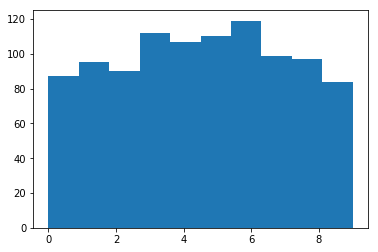

In [29]:
samplesT = matrix_transpose(samples)
sm = [sum(samplesT[i]) for i in range(len(samplesT))]
plt.hist(sm, bins=10)

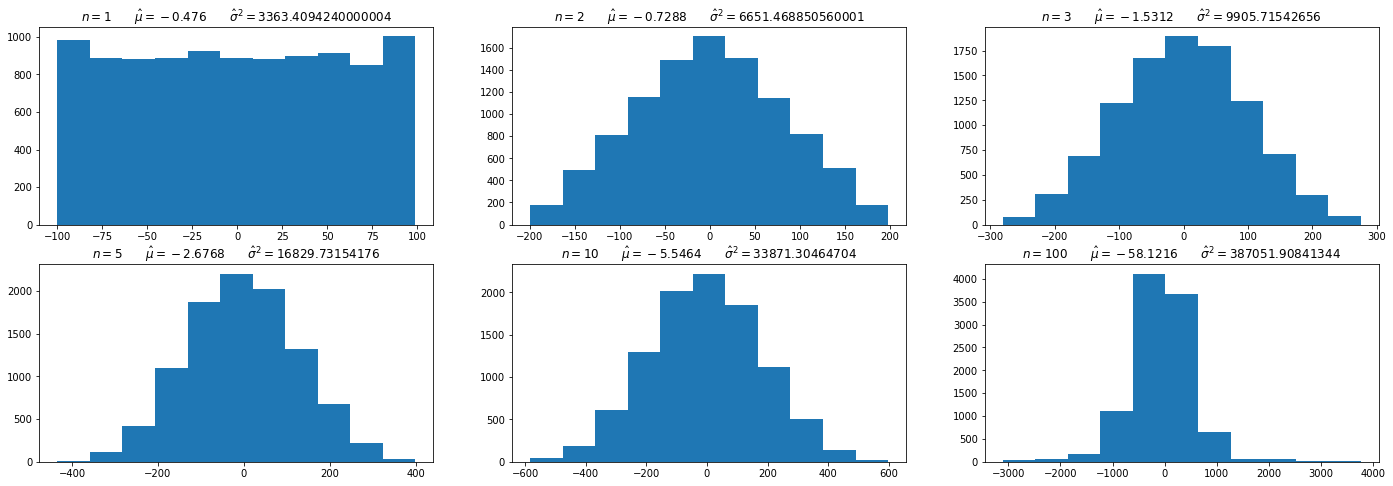

In [36]:
f, ax = plt.subplots(2, 3, figsize=(24, 8))
ns = [1, 2, 3, 5, 10, 100]
for i in range(2):
    for j in range(3):
        n = ns[i * 3 + j]
        interval = (-100, 100)
        samples = gen_N_rand_samples(n, 10000, interval)
        samplesT = matrix_transpose(samples)
        sm = [sum(samplesT[j]) for j in range(len(samplesT))]
        ax[i][j].hist(sm, bins = 11)
        ax[i][j].set_title(r'$n = {0} \qquad \hat\mu = {1} \qquad \hat\sigma^2 = {2}$'.format(n, np.mean(sm), np.var(sm)))
plt.show()

Sabemos que la media y la varianza de las distribuciones es


$\mu = \frac{n(b-a)}{2} \qquad \sigma^2 = \frac{n (b-a)^2}{12} \sigma = \sqrt{\frac{n}{12}} (b-a) $


Esto se puede demostrar facilmente.

Por las propiedades de las esperanzas sabemos que $E(X_1 + X_2 + ... + X_n) = EX_1 + EX_2 + \cdots + EX_n$, como todas vienen de la misma distribución tenemos que $E(X_1 + X_2 + ... + X_n) = n * EX$ donde $EX = \frac{b - a}{2}$ ya que viene de una distribución uniforme. Con las propiedades de las varianzas sabemos que $Var(X_1 + X_2 + \cdots + X_n) = Var(X_1) + Var(X_2) + \cdots + Var(X_n)$ cuando las variables son independiente (lo cual dado el algoritmo pseudo-aleatorio no es completamente cierto, pero asumimos que sí). Al ser de la misma distribución tenemos $Var(X_1 + X_2 + \cdots + X_n) = n Var(X)$, sabemos que la varianza de una distrinución uniforme es $\frac{1}{12}(b-a)^2$

Usando esta información podemos generar los datos de una normal ${N}(\mu, \sigma)$. Consideramos $Z \sim N(0,1)$ por lo que $X = \sigma_x Z + \mu_x \quad Z = (X - \mu_x)/\sigma_x$. Si ahora podemos generar X, para generar $Y \sim N(\mu_y,\sigma_y)$ basta con escribir Y en terminos de X.
$$
Y = \sigma_y Z + \mu_y \\
Y = \sigma_y \frac{X - \mu_x}{\sigma_x} + \mu_y \\
$$

In [54]:
def gen_normal(mu, sigma, n , n_dists = 100):
    interval = (-100, 100) #nos da mu 0 (en casos ideales...)
    sigma_x = 200 * (n_dists/ 12) ** (1/2)
    X = matrix_transpose(gen_N_rand_samples(n_dists, n, interval))
    X = [sum(X[j]) for j in range(len(X))]
    Y = [X[i] * (sigma/sigma_x) + mu for i in range(len(X))]
    return Y

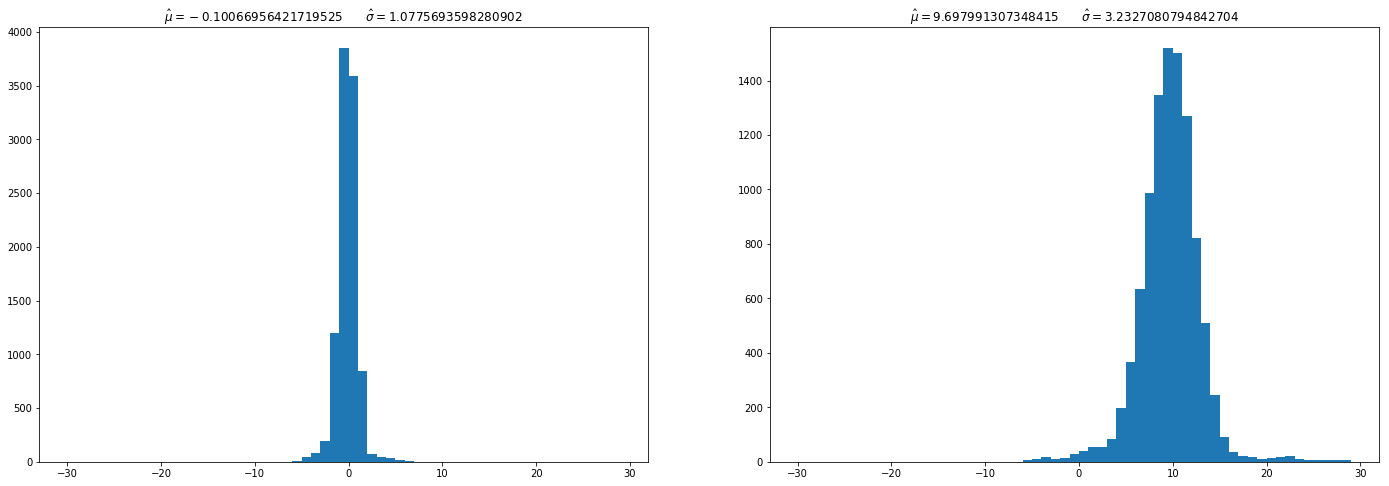

In [77]:
st = gen_normal(0,  1, 10000)
gs = gen_normal(10, 3, 10000)

f, ax = plt.subplots(1, 2, figsize=(24, 8))
ax[0].hist(st, range(-30, 30))
ax[0].set_title(r'$\hat\mu = {0} \qquad \hat\sigma = {1}$'.format( np.mean(st), np.std(st)))
ax[1].hist(gs, range(-30, 30))
ax[1].set_title(r'$\hat\mu = {0} \qquad \hat\sigma = {1}$'.format( np.mean(gs), np.std(gs)))

plt.show()

In [82]:
al = gen_random_sample_dist(interval)
A = [ [al() for i in range(100)] for j in range(100)]